In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_pickle('data/merged.pkl')

In [2]:

df = data.dropna(subset=['refuellingTimePointActual'])
print("data: ")
print(data.shape)
print(" df: ")
print(df.shape)

data: 
(11836055, 68)
 df: 
(9065441, 68)


In [3]:
df.columns

Index(['date', 'outsideTemperature', 'refuellingQuantity',
       'refuellingTimePoint', 'prematureRefuellingCount', 'operationPhase',
       'operationPhaseNumeric', 'residualOxygen', 'flueGasTemperature',
       'bufferTemperatureTop', 'bufferTemperatureMiddleTop',
       'bufferTemperatureMiddle', 'bufferTemperatureMiddleBottom',
       'bufferTemperatureBottom', 'bufferChargingDegree',
       'bufferUsableEnergyMax', 'bufferUsableEnergyActual',
       'refuellingDateActual', 'refuellingChargingDegreeActual',
       'refuellingTimePointActual', 'Year sin', 'Year cos', 'Anheizen',
       'Anzünden', 'Ausbrennen', 'Ausgeschaltet', 'Automatik', 'Vorbelüften',
       'Zündung bereit', 'bufferChargingDegree_5', 'refuellingTimePoint_5',
       'Ausgeschaltet_5', 'bufferChargingDegree_10', 'refuellingTimePoint_10',
       'Ausgeschaltet_10', 'bufferChargingDegree_15', 'refuellingTimePoint_15',
       'Ausgeschaltet_15', 'bufferChargingDegree_30', 'refuellingTimePoint_30',
       'Ausgescha

In [4]:
print(df['refuellingTimePointActual'])

0            3.205556
1            3.202778
2            3.200000
3            3.197222
4            3.194444
              ...    
11831576    10.272222
11831577    10.269444
11831578    10.266667
11831579    10.263889
11831580    10.261111
Name: refuellingTimePointActual, Length: 9065441, dtype: float64


In [5]:
# Ensure 'date' column is in datetime format and set it as the index
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

# Create lag features (e.g., lag 1 and lag 2 for 'refuellingTimePointActual')
#df['lag1_refuellingTime'] = df['refuellingTimePointActual'].shift(1)
#df['lag2_refuellingTime'] = df['refuellingTimePointActual'].shift(2)

# Split data into features and target variable
X = df[['outsideTemperature', 'refuellingQuantity', 'refuellingTimePoint', 'operationPhaseNumeric',
       'residualOxygen', 'flueGasTemperature', 'bufferTemperatureTop',
       'bufferTemperatureMiddleTop', 'bufferTemperatureMiddle',
       'bufferTemperatureMiddleBottom', 'bufferTemperatureBottom',
       'bufferChargingDegree', 'bufferUsableEnergyMax',
       'bufferUsableEnergyActual', 'Year sin', 'Year cos',
       'weatherTemperature', 'weatherWindX', 'weatherWindY',
       'weatherTemperature_6', 'weatherWindX_6', 'weatherWindY_6',
       'weatherTemperature_12', 'weatherWindX_12', 'weatherWindY_12',
       'weatherTemperature_18', 'weatherWindX_18', 'weatherWindY_18',
       'weatherTemperature_24', 'weatherWindX_24', 'weatherWindY_24']]  # Include relevant features
y = df['refuellingTimePointActual']  # Target variable

# Split the data into training and testing sets


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)



In [6]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=500,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.05,            # Learning rate (you can adjust this)
    max_depth=8                   # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

/Users/noahpeeters/Developer/holzofen-machine-learning/venv/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/noahpeeters/Developer/holzofen-machine-learning/venv/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:40.51161
[1]	validation_0-rmse:38.60645
[2]	validation_0-rmse:36.77393
[3]	validation_0-rmse:35.04595
[4]	validation_0-rmse:33.40577
[5]	validation_0-rmse:31.88248
[6]	validation_0-rmse:30.33311
[7]	validation_0-rmse:28.97723
[8]	validation_0-rmse:27.69567
[9]	validation_0-rmse:26.45563
[10]	validation_0-rmse:25.27847
[11]	validation_0-rmse:24.10268
[12]	validation_0-rmse:23.03168
[13]	validation_0-rmse:22.07004
[14]	validation_0-rmse:21.18537
[15]	validation_0-rmse:20.29206
[16]	validation_0-rmse:19.47491
[17]	validation_0-rmse:18.70755
[18]	validation_0-rmse:17.97712
[19]	validation_0-rmse:17.28931
[20]	validation_0-rmse:16.61117
[21]	validation_0-rmse:16.00095
[22]	validation_0-rmse:15.47278
[23]	validation_0-rmse:14.97560
[24]	validation_0-rmse:14.48252
[25]	validation_0-rmse:14.02195
[26]	validation_0-rmse:13.63498
[27]	validation_0-rmse:13.23204
[28]	validation_0-rmse:12.85925
[29]	validation_0-rmse:12.53113
[30]	validation_0-rmse:12.22725
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
y_pred = xgb_model.predict(X_test)


In [8]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'MAPE: {mape}')

Root Mean Squared Error (RMSE): 9.543364013511654
MAPE: 0.3127426352494771


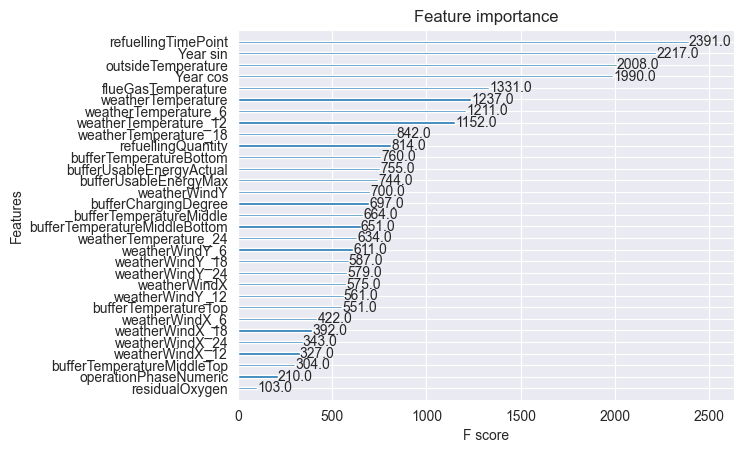

In [9]:
xgb.plot_importance(xgb_model)
plt.show()

In [ ]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1000,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.01,            # Learning rate (you can adjust this)
    max_depth=10                   # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

xgb.plot_importance(xgb_model)
plt.show()

/Users/noahpeeters/Developer/holzofen-machine-learning/venv/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/noahpeeters/Developer/holzofen-machine-learning/venv/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:42.13893
[1]	validation_0-rmse:41.72392
[2]	validation_0-rmse:41.31297
[3]	validation_0-rmse:40.91218
[4]	validation_0-rmse:40.51182
[5]	validation_0-rmse:40.11798
[6]	validation_0-rmse:39.72848
[7]	validation_0-rmse:39.35696
[8]	validation_0-rmse:38.97449
[9]	validation_0-rmse:38.59591
[10]	validation_0-rmse:38.23630
[11]	validation_0-rmse:37.86641
[12]	validation_0-rmse:37.51468
[13]	validation_0-rmse:37.15482
[14]	validation_0-rmse:36.79672
[15]	validation_0-rmse:36.45446
[16]	validation_0-rmse:36.10623
[17]	validation_0-rmse:35.76491
[18]	validation_0-rmse:35.43056
[19]	validation_0-rmse:35.09549
[20]	validation_0-rmse:34.76680
[21]	validation_0-rmse:34.44460
[22]	validation_0-rmse:34.12063
[23]	validation_0-rmse:33.80437
[24]	validation_0-rmse:33.48819
[25]	validation_0-rmse:33.17153
[26]	validation_0-rmse:32.86474
[27]	validation_0-rmse:32.56330
[28]	validation_0-rmse:32.25868
[29]	validation_0-rmse:31.94977
[30]	validation_0-rmse:31.64751
[31]	validation_0-

In [ ]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1000,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.02,            # Learning rate (you can adjust this)
    max_depth=16                   # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

xgb.plot_importance(xgb_model)
plt.show()

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

[0]	validation_0-rmse:49.91978
[1]	validation_0-rmse:49.08197
[2]	validation_0-rmse:48.24425
[3]	validation_0-rmse:47.44428
[4]	validation_0-rmse:46.66306
[5]	validation_0-rmse:45.87888
[6]	validation_0-rmse:45.14024
[7]	validation_0-rmse:44.38802
[8]	validation_0-rmse:43.69472
[9]	validation_0-rmse:42.99285
[10]	validation_0-rmse:42.32760
[11]	validation_0-rmse:41.65501
[12]	validation_0-rmse:41.02873
[13]	validation_0-rmse:40.39733
[14]	validation_0-rmse:39.76924
[15]	validation_0-rmse:39.17226
[16]	validation_0-rmse:38.58557
[17]	validation_0-rmse:38.01902
[18]	validation_0-rmse:37.46596
[19]	validation_0-rmse:36.92021
[20]	validation_0-rmse:36.37720
[21]	validation_0-rmse:35.84274
[22]	validation_0-rmse:35.32366
[23]	validation_0-rmse:34.81457
[24]	validation_0-rmse:34.31185
[25]	validation_0-rmse:33.85085
[26]	validation_0-rmse:33.37648
[27]	validation_0-rmse:32.91201
[28]	validation_0-rmse:32.48261
[29]	validation_0-rmse:32.03470
[30]	validation_0-rmse:31.58689
[31]	validation_0-

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

Root Mean Squared Error (RMSE): 5.193776435433102


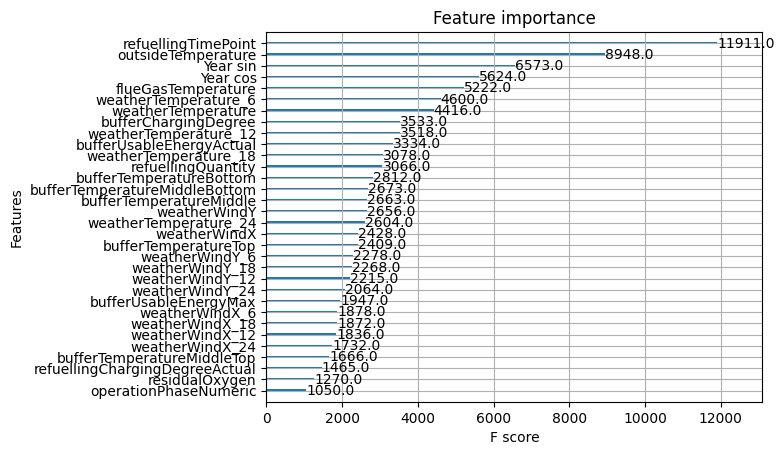

In [52]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1000,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.02,            # Learning rate (you can adjust this)
    max_depth=8                  # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

xgb.plot_importance(xgb_model)
plt.show()

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

[0]	validation_0-rmse:50.58030
[1]	validation_0-rmse:50.35638
[2]	validation_0-rmse:50.13407
[3]	validation_0-rmse:49.91255
[4]	validation_0-rmse:49.69326
[5]	validation_0-rmse:49.47426
[6]	validation_0-rmse:49.25693
[7]	validation_0-rmse:49.04036
[8]	validation_0-rmse:48.82552
[9]	validation_0-rmse:48.61145
[10]	validation_0-rmse:48.39958
[11]	validation_0-rmse:48.18855
[12]	validation_0-rmse:47.97885
[13]	validation_0-rmse:47.77203
[14]	validation_0-rmse:47.56688
[15]	validation_0-rmse:47.36341
[16]	validation_0-rmse:47.15977
[17]	validation_0-rmse:46.96049
[18]	validation_0-rmse:46.75706
[19]	validation_0-rmse:46.55986
[20]	validation_0-rmse:46.36056
[21]	validation_0-rmse:46.16335
[22]	validation_0-rmse:45.96695
[23]	validation_0-rmse:45.77027
[24]	validation_0-rmse:45.57640
[25]	validation_0-rmse:45.38928
[26]	validation_0-rmse:45.20519
[27]	validation_0-rmse:45.02167
[28]	validation_0-rmse:44.83560
[29]	validation_0-rmse:44.65508
[30]	validation_0-rmse:44.47430
[31]	validation_0-

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

Root Mean Squared Error (RMSE): 6.383657871274781


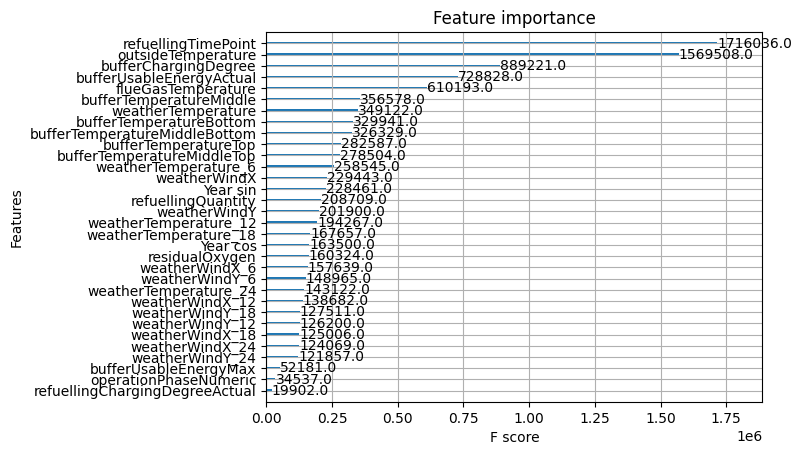

In [54]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1000,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.005,            # Learning rate (you can adjust this)
    max_depth=16                   # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

xgb.plot_importance(xgb_model)
plt.show()

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

[0]	validation_0-rmse:48.59546
[1]	validation_0-rmse:46.57629
[2]	validation_0-rmse:44.67636
[3]	validation_0-rmse:42.91027
[4]	validation_0-rmse:41.18701
[5]	validation_0-rmse:39.58295
[6]	validation_0-rmse:38.06754
[7]	validation_0-rmse:36.69744
[8]	validation_0-rmse:35.35072
[9]	validation_0-rmse:34.07468
[10]	validation_0-rmse:32.91470
[11]	validation_0-rmse:31.78628
[12]	validation_0-rmse:30.68115
[13]	validation_0-rmse:29.66614
[14]	validation_0-rmse:28.79769
[15]	validation_0-rmse:27.93938
[16]	validation_0-rmse:27.14488
[17]	validation_0-rmse:26.35578
[18]	validation_0-rmse:25.66832
[19]	validation_0-rmse:24.97921
[20]	validation_0-rmse:24.34571
[21]	validation_0-rmse:23.74820
[22]	validation_0-rmse:23.16920
[23]	validation_0-rmse:22.62193
[24]	validation_0-rmse:22.10218
[25]	validation_0-rmse:21.60791
[26]	validation_0-rmse:21.15662
[27]	validation_0-rmse:20.75444
[28]	validation_0-rmse:20.38693
[29]	validation_0-rmse:19.99265
[30]	validation_0-rmse:19.62308
[31]	validation_0-

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

Root Mean Squared Error (RMSE): 5.160616666765625


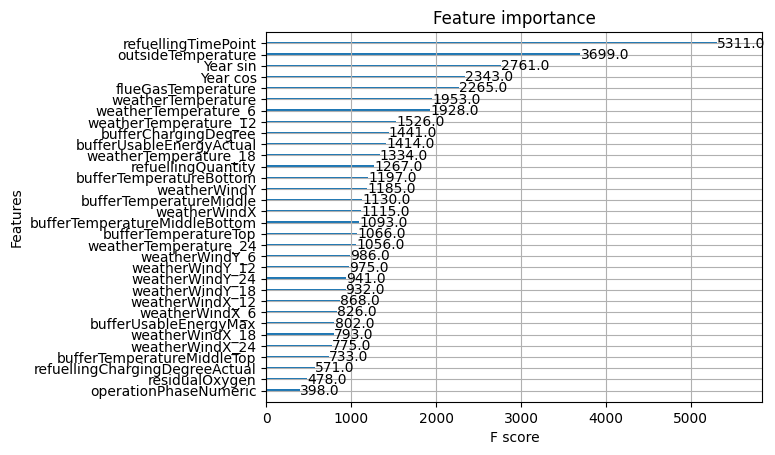

In [56]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1000,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.05,            # Learning rate (you can adjust this)
    max_depth=8                  # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

xgb.plot_importance(xgb_model)
plt.show()

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

[0]	validation_0-rmse:48.56610
[1]	validation_0-rmse:46.52828
[2]	validation_0-rmse:44.63689
[3]	validation_0-rmse:42.83079
[4]	validation_0-rmse:41.19717
[5]	validation_0-rmse:39.63769
[6]	validation_0-rmse:38.14745
[7]	validation_0-rmse:36.73020
[8]	validation_0-rmse:35.42416
[9]	validation_0-rmse:34.17675
[10]	validation_0-rmse:32.96866
[11]	validation_0-rmse:31.84707
[12]	validation_0-rmse:30.78155
[13]	validation_0-rmse:29.79488
[14]	validation_0-rmse:28.86270
[15]	validation_0-rmse:27.97005
[16]	validation_0-rmse:27.13865
[17]	validation_0-rmse:26.34690
[18]	validation_0-rmse:25.60917
[19]	validation_0-rmse:24.90935
[20]	validation_0-rmse:24.26986
[21]	validation_0-rmse:23.67657
[22]	validation_0-rmse:23.11852
[23]	validation_0-rmse:22.57947
[24]	validation_0-rmse:22.09947
[25]	validation_0-rmse:21.64323
[26]	validation_0-rmse:21.20718
[27]	validation_0-rmse:20.81897
[28]	validation_0-rmse:20.44181
[29]	validation_0-rmse:20.09612
[30]	validation_0-rmse:19.77514
[31]	validation_0-

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

Root Mean Squared Error (RMSE): 5.571298451986961


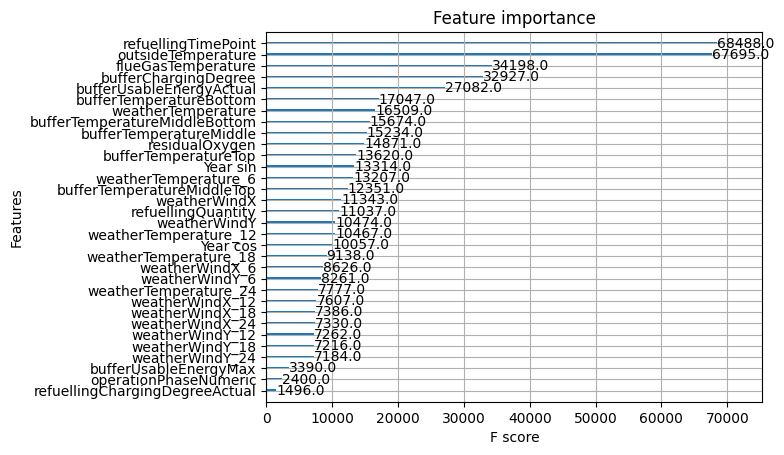

In [57]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1000,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.05,            # Learning rate (you can adjust this)
    max_depth=12                  # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

xgb.plot_importance(xgb_model)
plt.show()

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

[0]	validation_0-rmse:48.56367
[1]	validation_0-rmse:46.44871
[2]	validation_0-rmse:44.47017
[3]	validation_0-rmse:42.66728
[4]	validation_0-rmse:40.96853
[5]	validation_0-rmse:39.38223
[6]	validation_0-rmse:37.87217
[7]	validation_0-rmse:36.48006
[8]	validation_0-rmse:35.18942
[9]	validation_0-rmse:33.95678
[10]	validation_0-rmse:32.81205
[11]	validation_0-rmse:31.71563
[12]	validation_0-rmse:30.69790
[13]	validation_0-rmse:29.75334
[14]	validation_0-rmse:28.87551
[15]	validation_0-rmse:28.04627
[16]	validation_0-rmse:27.26359
[17]	validation_0-rmse:26.53769
[18]	validation_0-rmse:25.85467
[19]	validation_0-rmse:25.21150
[20]	validation_0-rmse:24.61643
[21]	validation_0-rmse:24.05740
[22]	validation_0-rmse:23.52477
[23]	validation_0-rmse:23.04507
[24]	validation_0-rmse:22.59934
[25]	validation_0-rmse:22.16781
[26]	validation_0-rmse:21.78416
[27]	validation_0-rmse:21.41188
[28]	validation_0-rmse:21.07205
[29]	validation_0-rmse:20.73701
[30]	validation_0-rmse:20.43112
[31]	validation_0-

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

Root Mean Squared Error (RMSE): 6.395054402429937


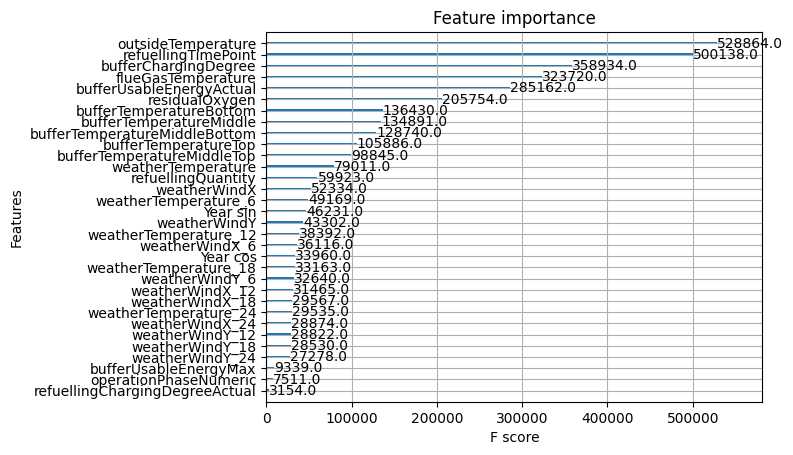

In [58]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1000,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.05,            # Learning rate (you can adjust this)
    max_depth=16                  # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=50,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

xgb.plot_importance(xgb_model)
plt.show()

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

[0]	validation_0-rmse:48.56610
[1]	validation_0-rmse:46.52828
[2]	validation_0-rmse:44.63689
[3]	validation_0-rmse:42.83079
[4]	validation_0-rmse:41.19717
[5]	validation_0-rmse:39.63769
[6]	validation_0-rmse:38.14745
[7]	validation_0-rmse:36.73020
[8]	validation_0-rmse:35.42416
[9]	validation_0-rmse:34.17675
[10]	validation_0-rmse:32.96866
[11]	validation_0-rmse:31.84707
[12]	validation_0-rmse:30.78155
[13]	validation_0-rmse:29.79488
[14]	validation_0-rmse:28.86270
[15]	validation_0-rmse:27.97005
[16]	validation_0-rmse:27.13865
[17]	validation_0-rmse:26.34690
[18]	validation_0-rmse:25.60917
[19]	validation_0-rmse:24.90935
[20]	validation_0-rmse:24.26986
[21]	validation_0-rmse:23.67657
[22]	validation_0-rmse:23.11852
[23]	validation_0-rmse:22.57947
[24]	validation_0-rmse:22.09947
[25]	validation_0-rmse:21.64323
[26]	validation_0-rmse:21.20718
[27]	validation_0-rmse:20.81897
[28]	validation_0-rmse:20.44181
[29]	validation_0-rmse:20.09612
[30]	validation_0-rmse:19.77514
[31]	validation_0-

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

Root Mean Squared Error (RMSE): 5.571298451986961


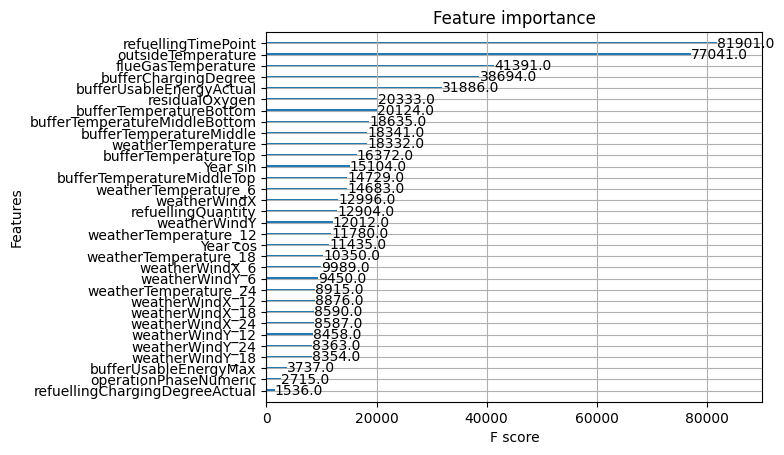

In [61]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1000,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.05,            # Learning rate (you can adjust this)
    max_depth=12                  # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=50,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

xgb.plot_importance(xgb_model)
plt.show()

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

[0]	validation_0-rmse:47.43663
[1]	validation_0-rmse:44.49921
[2]	validation_0-rmse:41.74170
[3]	validation_0-rmse:39.31226
[4]	validation_0-rmse:37.17260
[5]	validation_0-rmse:35.15765
[6]	validation_0-rmse:33.18476
[7]	validation_0-rmse:31.44969
[8]	validation_0-rmse:29.96598
[9]	validation_0-rmse:28.48123
[10]	validation_0-rmse:27.22151
[11]	validation_0-rmse:26.02790
[12]	validation_0-rmse:24.97832
[13]	validation_0-rmse:24.10438
[14]	validation_0-rmse:23.34479
[15]	validation_0-rmse:22.53274
[16]	validation_0-rmse:21.82655
[17]	validation_0-rmse:21.15782
[18]	validation_0-rmse:20.62239
[19]	validation_0-rmse:20.17769
[20]	validation_0-rmse:19.70506
[21]	validation_0-rmse:19.28141
[22]	validation_0-rmse:18.92109
[23]	validation_0-rmse:18.62763
[24]	validation_0-rmse:18.31379
[25]	validation_0-rmse:18.05665
[26]	validation_0-rmse:17.80544
[27]	validation_0-rmse:17.59659
[28]	validation_0-rmse:17.36724
[29]	validation_0-rmse:17.15062
[30]	validation_0-rmse:17.01120
[31]	validation_0-

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

Root Mean Squared Error (RMSE): 4.914617916052999


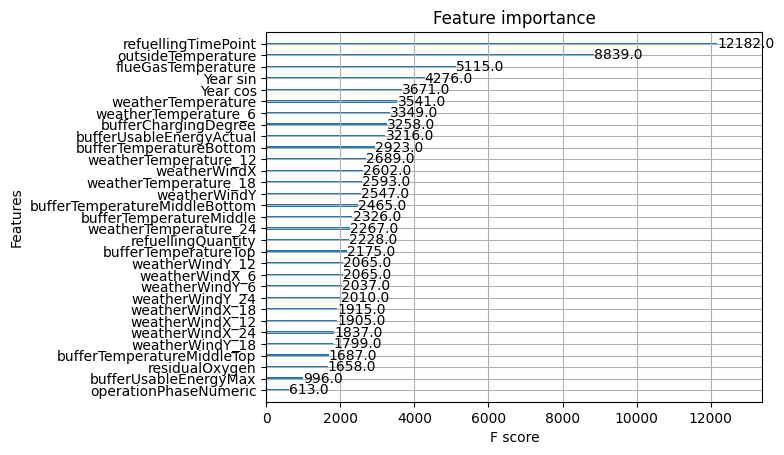

In [33]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1500,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.08,            # Learning rate (you can adjust this)
    max_depth=8                  # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=50,eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose=True )

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

xgb.plot_importance(xgb_model)
plt.show()

In [34]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'MAPE: {mape}')

Root Mean Squared Error (RMSE): 4.914617916052999
MAPE: 0.2568081857054379


/Users/noahpeeters/Developer/holzofen-machine-learning/venv/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/noahpeeters/Developer/holzofen-machine-learning/venv/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mape:0.89196
[1]	validation_0-mape:0.81539
[2]	validation_0-mape:0.74723
[3]	validation_0-mape:0.68221
[4]	validation_0-mape:0.62581
[5]	validation_0-mape:0.57560
[6]	validation_0-mape:0.53047
[7]	validation_0-mape:0.48865
[8]	validation_0-mape:0.45196
[9]	validation_0-mape:0.41915
[10]	validation_0-mape:0.39032
[11]	validation_0-mape:0.36588
[12]	validation_0-mape:0.34487
[13]	validation_0-mape:0.32566
[14]	validation_0-mape:0.31049
[15]	validation_0-mape:0.29680
[16]	validation_0-mape:0.28579
[17]	validation_0-mape:0.27564
[18]	validation_0-mape:0.26627
[19]	validation_0-mape:0.25826
[20]	validation_0-mape:0.25202
[21]	validation_0-mape:0.24693
[22]	validation_0-mape:0.24366
[23]	validation_0-mape:0.23940
[24]	validation_0-mape:0.23799
[25]	validation_0-mape:0.23585
[26]	validation_0-mape:0.23444
[27]	validation_0-mape:0.23388
[28]	validation_0-mape:0.23260
[29]	validation_0-mape:0.23238
[30]	validation_0-mape:0.23231
[31]	validation_0-mape:0.23360
[32]	validation_0-

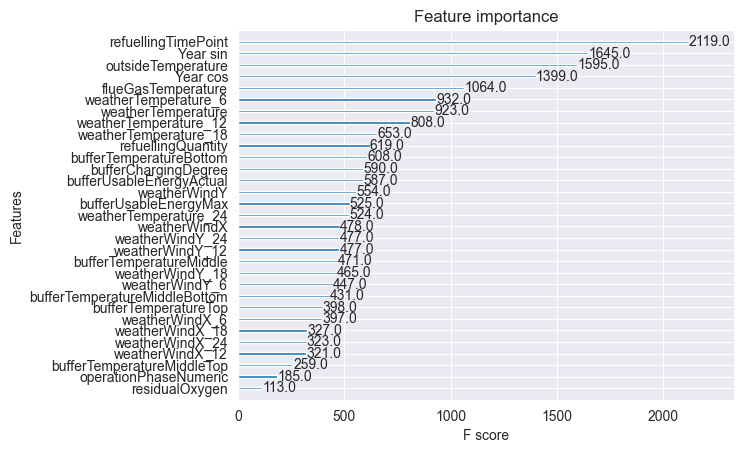

In [7]:
from sklearn.metrics import mean_absolute_percentage_error

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1500,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.08,            # Learning rate (you can adjust this)
    max_depth=8                  # Maximum tree depth (you can adjust this)
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=50,eval_set=[(X_valid, y_valid)], eval_metric='mape',verbose=True )

y_pred = xgb_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'MAPE: {mape}')

xgb.plot_importance(xgb_model)
plt.show()

c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Montemo\Desktop\holzofen-machine-learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

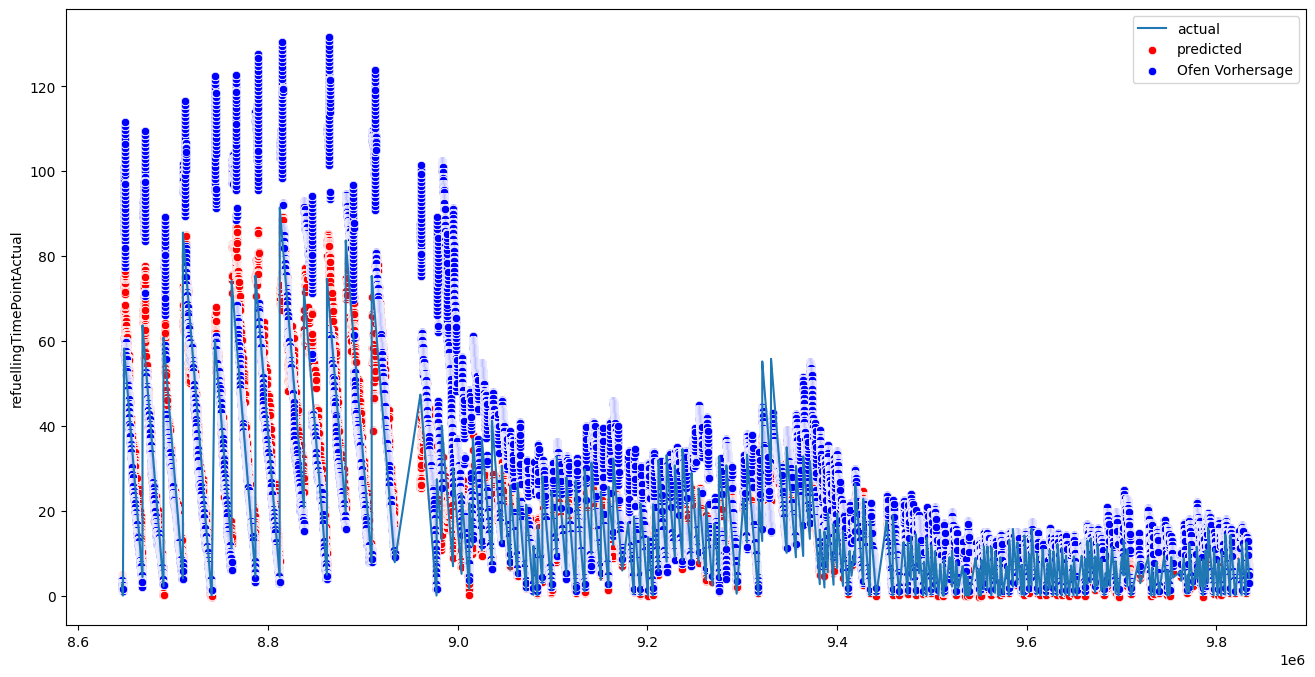

In [41]:
import seaborn as sns
        


# data for plot
data_display = X_test.iloc[:1000000]
y_display = y_test[:len(data_display)]
y_pred_display = y_pred[:len(data_display)]

sns.lineplot(x=data_display.index, y=y_display, label='actual')
sns.scatterplot(x=data_display.index, y=y_pred_display, label='predicted', color='red')
sns.scatterplot(x=data_display.index, y=data_display['refuellingTimePoint'], label='Ofen Vorhersage', color='blue')

# set figure size
plt.gcf().set_size_inches(16, 8)
